# 🧩 Sesión 3 – Lectura, Escritura y Limpieza de Datos en Pandas

## 🎯 **Objetivo**
Aprender a trabajar con fuentes externas de datos y aplicar técnicas básicas de limpieza para preparar la información antes del análisis.

---

## 🧠 **Conceptos clave**

### 🔹 Lectura de archivos
Pandas permite importar datos desde diferentes formatos:

```python
import pandas as pd

df_csv = pd.read_csv('data/ventas.csv')
df_excel = pd.read_excel('data/ventas.xlsx')
df_json = pd.read_json('data/ventas.json')


In [2]:
#Conectar tu Google Drive al cuaderno
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# copiar la ruta de la carpeta donde esta el archivo
%cd "/content/drive/MyDrive/Programación 2/Taller limpieza de datos"

/content/drive/MyDrive/Programación 2/Taller limpieza de datos


In [4]:
# mira lo archivos que estan en la carpeta
!ls

'17 Taller_Pandas_App_Streaming_SOLUCIONES.ipynb'   Taller_datos.xlsx


In [ ]:
#abrir el archivo a trabajar
import pandas as pd

df = pd.read_excel("Datos_sucios.xlsx")

df.head(4)

,id_cliente,nombre,pais,destino,precio_usd,medio_contacto,fecha_contacto,satisfaccion
0,8659,Cliente_0,mexico,Bogotá,1149.01,Llamada,2022-11-29,3.0
1,8797,Cliente_1,colombia,CDMX,958.52,llamada,2022-08-11,3.0
2,3596,Cliente_2,peru,Bogotá,1194.31,llamada,2022-05-30,4.0
3,6190,Cliente_3,México,CDMX,1456.91,Correo,2022-03-12,1.0


In [ ]:
#Información de la base de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_cliente      105 non-null    int64         
 1   nombre          105 non-null    object        
 2   pais            100 non-null    object        
 3   destino         105 non-null    object        
 4   precio_usd      100 non-null    float64       
 5   medio_contacto  100 non-null    object        
 6   fecha_contacto  105 non-null    datetime64[ns]
 7   satisfaccion    82 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 6.7+ KB


In [ ]:
# Contar datos faltantes
df.isnull().sum()

,0
id_cliente,0
nombre,0
pais,5
destino,0
precio_usd,5
medio_contacto,5
fecha_contacto,0
satisfaccion,23


In [ ]:
#Porcentaje de los datos faltantes
(df.isnull().sum() / len(df)) * 100

,0
id_cliente,0.000000
nombre,0.000000
pais,4.761905
destino,0.000000
precio_usd,4.761905
medio_contacto,4.761905
fecha_contacto,0.000000
satisfaccion,21.904762


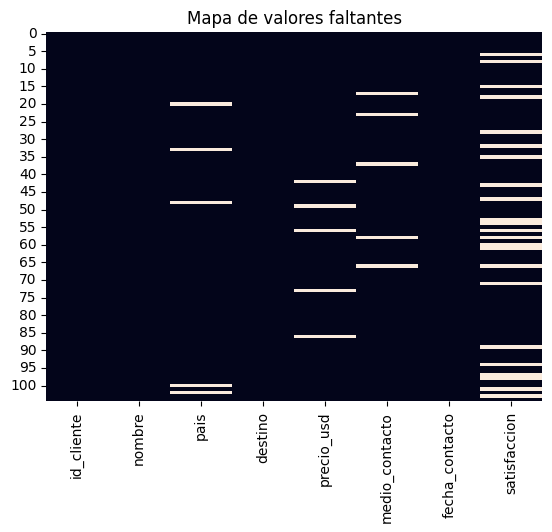

In [ ]:
#Vizualiacion de datos faltantes
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()


## Eliminación de datos faltantes

- Eliminar filas cuando los datos faltantes son pocos ($<5\%$ del total).

- Eliminar columnas con muchos datos faltantes ( $> 35 \%$ del total)

In [ ]:
# Elimina las filas que tiene datos faltantes en un variable especifica
df = df.dropna(subset=['pais'])

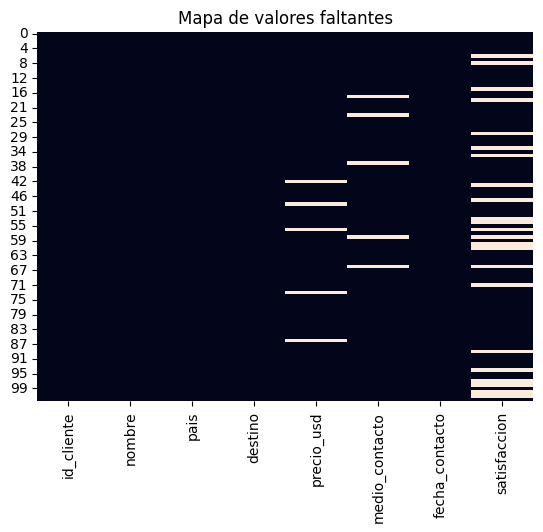

In [ ]:
#Vizualiacion de datos faltantes
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()

## Imputación  de datos faltantes

- Cuando los datos faltantes son significativos pero no críticos.

- Cuando la eliminación afectaría el análisis.

## Métodos de Imputación:

* Imputación con medidas de tendencia central
    - Media: Para datos numéricos sin outliers.
    - Mediana: Mejor si hay outliers.
    - Moda: Para variables categóricas.

* Imputación con modelos predictivos (avanzado)
    - KNN Random
    - Forest
    - Regresiones para predecir valores faltantes.

```python

df['variable'] = df['variable'].fillna(valor)


In [ ]:
df['medio_contacto'].mode()[0]

'llamada'

In [ ]:
df['medio_contacto'].mode()[0]

'llamada'

In [ ]:
# Imputamos los valores faltantes de medio_contacto con la moda
valor = df['medio_contacto'].mode()[0]
df['medio_contacto'] = df['medio_contacto'].fillna(valor)

In [ ]:
# Imputa  lo valores faltantes de la variable precio_usd con la media, es decir con el promedio
valor =  df['precio_usd'].mean()
df['precio_usd'] = df['precio_usd'].fillna(valor)

In [ ]:
# muestra la media, mediana, y moda de la variable satisfaccion
media = df['satisfaccion'].mean()
mediana = df['satisfaccion'].median()
moda = df['satisfaccion'].mode()[0] #

print(f"Media de satisfaccion: {media}")
print(f"Mediana de satisfaccion: {mediana}")
print(f"Moda de satisfaccion: {moda}")

Media de satisfaccion: 2.9220779220779223
Mediana de satisfaccion: 3.0
Moda de satisfaccion: 4.0


In [ ]:
# Impute lo valores faltantes de la variable satisfaccion con la mediana
valor = df['satisfaccion'].median()
df['satisfaccion'] = df['satisfaccion'].fillna(valor)


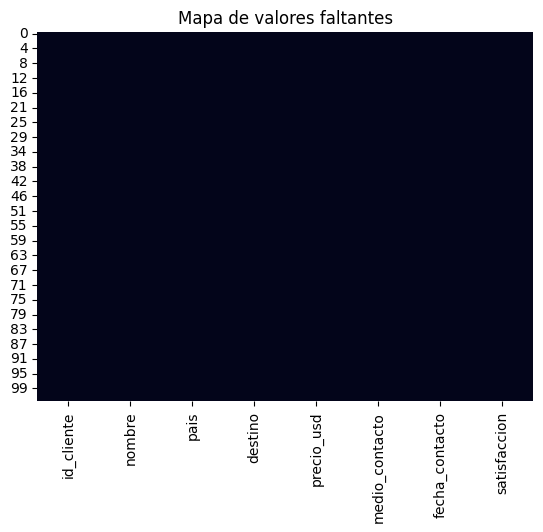

In [ ]:
#Vizualiacion de datos faltantes
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()

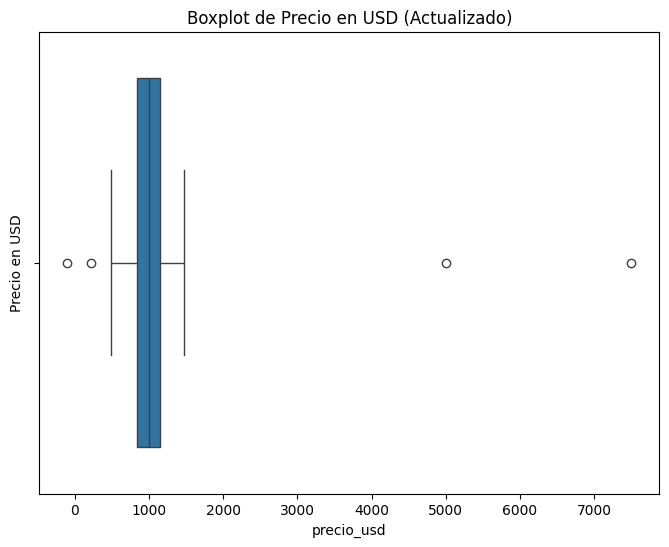

In [ ]:
# graficar un boxplot de una varaible numerica
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['precio_usd'])
plt.title('Boxplot de Precio en USD (Actualizado)')
plt.ylabel('Precio en USD')
plt.show()

Observe que hay 4 datos atipicos:

1) El menor es un valor negativo, fue un error humano, por lo tanto cambie el valor a 1000.

2) los dos mas grandes se deben eliminar

In [ ]:
df[df["precio_usd"]<500]

,id_cliente,nombre,pais,destino,precio_usd,medio_contacto,fecha_contacto,satisfaccion
14,8569,Cliente_14,Colombia,Machu Picchu,482.52,llamada,2022-09-11,5.0
74,5801,Cliente_74,mexico,Bogotá,214.08,whatsapp,2022-10-01,3.0
80,9947,Cliente_80,México,Machu Picchu,-100.00,Correo,2022-06-24,5.0


In [ ]:
df.loc[df['id_cliente'] == 9947, 'precio_usd'] = 1000

In [ ]:
df[df["precio_usd"]>4000]

,id_cliente,nombre,pais,destino,precio_usd,medio_contacto,fecha_contacto,satisfaccion
62,3580,Cliente_62,Perú,Cancún,7500.0,WhatsApp,2022-11-22,3.0
78,9823,Cliente_78,Perú,Cancún,5000.0,correo,2022-05-16,2.0


In [ ]:
# solución ejercicio
df=df.drop(62)
df=df.drop(78)

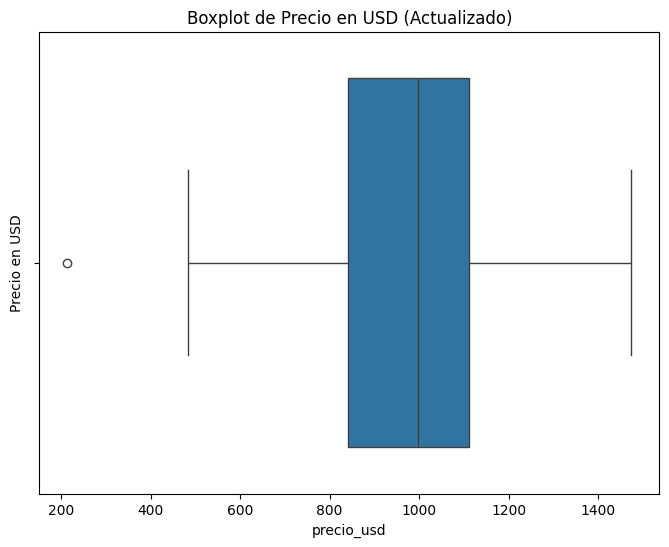

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['precio_usd'])
plt.title('Boxplot de Precio en USD (Actualizado)')
plt.ylabel('Precio en USD')
plt.show()

## Inconsistencias en texto

Las bases de datos suelen contener errores humanos o formatos diferentes para una misma categoría. Esto puede hacer que un país, ciudad o canal de contacto aparezca varias veces con nombres distintos.

### ¿Qué efectos tienen?

- Duplicación de categorías en visualizaciones.
- Cálculos erróneos al agrupar.
- Tablas resumen infladas con valores similares.
- Pérdida de confianza en el informe.

Pasos para solucionar:

- Contar cuántos registros tiene cada categoría de una variable usando `df['variable'].value_counts()`

- Estandariza los valores de la variabl para que cada catégoria, haga un diccioanrio llamado `Mapeo` y use el método df['variable'] = df['variable'].map(Mapeo)

Veamos las variables categoricas país

In [ ]:
df['pais'].value_counts()

,count
pais,
mexico,19
México,18
Colombia,14
Perú,14
colombia,13
COL,12
peru,8


In [ ]:
Mapeo = {
    'mexico': 'Mexico',
    'México': 'Mexico',
    'colombia': 'Colombia',
    'COL': 'Colombia',
    'peru': 'Peru',
    'Perú': 'Peru',
    "Colombia":"Colombia"
}
df['pais'] = df['pais'].map(Mapeo)
df['pais'].value_counts()

,count
pais,
Colombia,39
Mexico,37
Peru,22


In [ ]:
df.shape

(98, 8)

#Ejercicio 2

Revisar que las varaibles: `destino`y  `medio_contacto`

In [ ]:
df["destino"].value_counts()

,count
destino,
CDMX,25
Cusco,17
Bogotá,15
Cartagena,14
Machu Picchu,14
Cancún,13


In [ ]:
df["medio_contacto"].value_counts()

,count
medio_contacto,
llamada,27
Correo,20
whatsapp,14
correo,14
WhatsApp,13
Llamada,10


In [ ]:
Mapeo={"llamada":"Llamada",
       "Correo":"Correo",
       "whatsapp":"WhatsApp",
       "correo":"Correo",
       "WhatsApp":"WhatsApp",
       "Llamada":"Llamada",
}
df['medio_contacto'] = df['medio_contacto'].map(Mapeo)
df['medio_contacto'].value_counts()


,count
medio_contacto,
Llamada,37
Correo,34
WhatsApp,27


In [ ]:
df.shape

(98, 8)

# Datos duplicados

Un dato duplicado es un registro que aparece más de una vez en la base de datos.Puede ser exactamente igual (duplicado exacto) o muy similar (duplicado difuso).

usar : `df[df.duplicated(keep=False)]`

In [ ]:
df[df.duplicated(keep=False)]

,id_cliente,nombre,pais,destino,precio_usd,medio_contacto,fecha_contacto,satisfaccion


In [ ]:
df=df.drop(101)
df=df.drop(103)
df=df.drop(104)

In [ ]:
df[df.duplicated(keep=False)]

## ✅ Cómo guardar un DataFrame limpio

* `df.to_csv("Datos_limpios.csv", index=False)`

index=False evita que Pandas escriba la columna del índice como una columna adicional en el archivo.

Este formato es muy usado, ligero, y compatible con muchos sistemas (Excel, R, Python, SQL, etc.).

*`df.to_excel("Datos_limpios.xlsx", index=False)`

Requiere tener instalada la librería `openpyxl` o `xlsxwriter`.

Conserva mejor los tipos de datos, permite guardar múltiples hojas, y es más amigable si el archivo será revisado por personas en Excel.


In [ ]:
df.to_excel("Datos_limpios.xlsx", index=False)